In [96]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [97]:
def overlay_mask(mask, image):
    # convert mask to rgb color scheme
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    
    # returned value = mask_array * 0.5 + image_array * 0.5
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    
    return img

In [98]:
def find_biggest_contour(image):
    # copy image
    image = image.copy()
    contours, hierarhy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    # isolate the largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    
    # return the biggest contour
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    
    return biggest_contour, mask

In [99]:
def circled_contour(image, contour):
    # bounding ellipse
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(contour)
    cv2.ellipse(image_with_ellipse, ellipse, (0, 0, 255), 2, cv2.LINE_AA)
    return image_with_ellipse

In [100]:
def detect_apple(image):
    # converting the image which is in BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(151)
    plt.imshow(image)
    
    # applying Gaussian Blur
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    
    # converting to HSV palette (`Hue` means color, `Saturation` means the amount of color, `Value` means brightness)
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    
    low_S = 100
    low_V = 80
    high_S = 255
    high_V = 255
    
    # creating the max and min values of green color in HSV palette
    # 120 — is the green hue value (of 360). But OpenCV is forcing this values to [0, 255] format. So, hue values are splitted by 2.
    # green hue value = 60
    min_green = np.array([30, low_S, low_V])
    max_green = np.array([45, high_S, high_V])
    
    # create mask using the range above
    mask = cv2.inRange(image_blur_hsv, min_green, max_green)
    
    plt.subplot(152)
    plt.imshow(mask)
    
#     mask2 = cv2.inRange(image_blur_hsv, min_green2, max_green2)
    
#     plt.subplot(142)
#     plt.imshow(mask2)

#     mask = mask1 + mask2
    
#     plt.subplot(143)
#     plt.imshow(mask)
    plt.show()
    
    # create kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
    # clearing the mask using morpghology
    # `close morphology` — removing noise from the foreground of the image
    # `open morphology` — removing noise from the background of the image
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
    
    # we want to find the biggest apple on the image
    biggest_apple_contour, mask_apples = find_biggest_contour(mask_clean)
    
    # overlay the masks on the image
    overlay = overlay_mask(mask_apples, image)
    
    # cirle the biggest apple
    circled = circled_contour(overlay, biggest_apple_contour)
    
    # convert the contour to standard color scheme
    bgr_circled = cv2.cvtColor(circled, cv2.COLOR_RGB2BGR)
    
    return bgr_circled

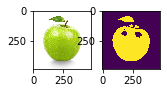

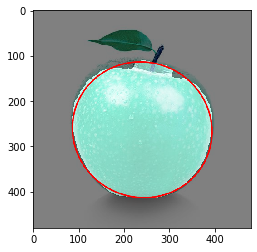

In [104]:
image = cv2.imread('apple.jpg')
result = detect_apple(apple)
plt.imshow(result, interpolation='nearest')